# Mid Term Project

## [COVID 19 Dataset](#https://health.google.com/covid-19/open-data/raw-data)
### Prerequisite: 
1. Download and unzip the dataset file in your working directory from the link provided below.
1. Please note the file size is big. Make sure you have enough disk space available.


- FileName : **aggregated.csv**
- Our idea is to show the trends with the COVID 19 data, countries affected, mortality rate, infection spread based on gender and vaccination.
- @article{Wahltinez2020,
  author = "O. Wahltinez and others",
  year = 2020,
  title = "COVID-19 Open-Data: curating a fine-grained, global-scale data repository for SARS-CoV-2",
  note = "Work in progress",
  url = {https://goo.gle/covid-19-open-data},
}

## File Validation:
- Verify dataset file exists in the current directory or not.

In [1]:
from os.path import exists

# function that verifies that dataset file exists or not
def is_file_exists(file_name):
    
    if exists(file_name):
        print('Dataset file',file_name,'exists in your directory. You are good to start!!')
    
    else:    
        print('Unable to find dataset file',file_name,'Make sure you downaloded and unzip it in your working directory!!')


In [2]:
dataset_file_name = 'aggregated.csv'

is_file_exists(dataset_file_name)

Dataset file aggregated.csv exists in your directory. You are good to start!!


In [3]:
import pandas as pd

aggregated_data = pd.read_csv(dataset_file_name, nrows = 5)
aggregated_data.head()

,location_key,date,place_id,wikidata_id,datacommons_id,country_code,country_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,aggregation_level,...,new_persons_fully_vaccinated_janssen,cumulative_persons_fully_vaccinated_janssen,new_persons_vaccinated_sinovac,total_persons_vaccinated_sinovac,new_vaccine_doses_administered_pfizer,cumulative_vaccine_doses_administered_pfizer,new_vaccine_doses_administered_moderna,cumulative_vaccine_doses_administered_moderna,new_vaccine_doses_administered_janssen,cumulative_vaccine_doses_administered_janssen
0,AD,2020-01-01,ChIJlfCemC71pRIRkn_qeNc-yQc,Q228,country/AND,AD,Andorra,AD,AND,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD,2020-01-02,ChIJlfCemC71pRIRkn_qeNc-yQc,Q228,country/AND,AD,Andorra,AD,AND,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD,2020-01-03,ChIJlfCemC71pRIRkn_qeNc-yQc,Q228,country/AND,AD,Andorra,AD,AND,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AD,2020-01-04,ChIJlfCemC71pRIRkn_qeNc-yQc,Q228,country/AND,AD,Andorra,AD,AND,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AD,2020-01-05,ChIJlfCemC71pRIRkn_qeNc-yQc,Q228,country/AND,AD,Andorra,AD,AND,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Intermediate CSV file Generation:
- Functions that generates another CSV file from the downloaded dataset file
- Given the required columns that are required for this project 
- Providing the index to read the value based on it's position 

In [4]:
# function that maps the column name to the index.
def get_column_index():
    
    header = pd.read_csv(dataset_file_name, nrows = 0)
    
    original_columns = header.columns
    
    column_length = len(original_columns)
    
    column_index_dict = {}

    for i in range(column_length):
        # map the column name with it's index
        column_index_dict[original_columns[i]] = i
    
    print('Successfully mapped the',column_length,'columns to its index')
    
    return column_index_dict

In [5]:
# columns that are used in this project
required_columns = ['date','country_name','new_confirmed','new_deceased','new_persons_vaccinated','population','infant_mortality_rate','new_tested','adult_male_mortality_rate','adult_female_mortality_rate','new_recovered','new_hospitalized_patients','new_intensive_care_patients','new_confirmed_male','new_confirmed_female','new_deceased_male','new_deceased_female','new_hospitalized_patients_male','new_hospitalized_patients_female','new_intensive_care_patients_male','new_intensive_care_patients_female','current_hospitalized_patients','current_intensive_care_patients','current_ventilator_patients','new_recovered_male','new_recovered_female','new_persons_vaccinated_pfizer','new_persons_vaccinated_moderna','new_persons_vaccinated_janssen','new_persons_vaccinated_sinovac']

column_index = get_column_index() 
# ex: column_index = {"date" : 1,"country_name" : 6,"new_confirmed" : 10,"new_deceased" : 11,...)

Successfully mapped the 708 columns to its index


## Data cleaning in intermediate operation:
- Verifying the row data if the requiired values are empty or 0.

In [6]:
# fucntion to validate the splitted data is empty or having zeros
def is_invalid(value):
    
    if value == '0' or len(value.strip()) <= 0:
        return True
    else:
        return False
    
# validate the row on the below fields
def validate_row(col_values):
    population_value = col_values[column_index['population']]   
    confirmed = col_values[column_index['new_confirmed']]
    tested = col_values[column_index['new_tested']]
    vaccinated = col_values[column_index['new_persons_vaccinated']]
    deceased = col_values[column_index['new_deceased']]
    
    is_valid_row = False
    if is_invalid(population_value):
        is_valid_row = False

    elif (is_invalid(confirmed) and is_invalid(tested) and is_invalid(vaccinated) and is_invalid(deceased)):
        is_valid_row = False
    
    else: 
        is_valid_row = True
        
    return is_valid_row

In [7]:
# write line date to output file

def write_row_data(line , file):
    
    split = line.split(',')
    res=""
    
    if validate_row(split):
        # write only the columns that are used in this project
        for column in required_columns:

              res += split[column_index[column]]+','

        # removing the extra comma at the end
        # adding \n at the end to bring the file pointer to next line
        file.write(res[:-1]+'\n')

In [8]:
# ref from https://www.geeksforgeeks.org/how-to-check-the-execution-time-of-python-script/

import csv
import time

# below code generate this csv file and it is loaded with dataframe 
output_file = 'covid-data.csv'

# open the dataset file 'aggregated.csv' in read mode 
with open(dataset_file_name, mode = 'r', encoding='latin-1') as reader:
    
    # open the output file in write mode to parallely write the read records 
    with open(output_file, mode='w') as writer:
        
        # to count the number of rows
        i = 0
        # to track the start time
        start = time.time()
        print('Dataset file is very big. This may take some time. Please wait until you see Successfully written...')   
    
        while(True):
        
            line = reader.readline()

            if not line or len(line) < 1:
                break
        
            write_row_data(line, writer)     
            
            i = i+1
            
    print('Successfully written',i,'records in',time.time()-start,'seconds')

Dataset file ie very big. This may take some time. Please wait until you see Successfully written...
Successfully written 18370401 records in 502.56520771980286 seconds


In [9]:
# read the newly generated csv file
# parse the date while reading the file itself
# make the index as date column
# as the file size is big, so more memory is needed. Hence making the low_memory as False

covid_data = pd.read_csv(output_file, low_memory = False, index_col = 'date', parse_dates = ['date'])

covid_data.tail()

,country_name,new_confirmed,new_deceased,new_persons_vaccinated,population,infant_mortality_rate,new_tested,adult_male_mortality_rate,adult_female_mortality_rate,new_recovered,...,new_intensive_care_patients_female,current_hospitalized_patients,current_intensive_care_patients,current_ventilator_patients,new_recovered_male,new_recovered_female,new_persons_vaccinated_pfizer,new_persons_vaccinated_moderna,new_persons_vaccinated_janssen,new_persons_vaccinated_sinovac
date,,,,,,,,,,,,,,,,,,,,,
2022-03-03,Zimbabwe,633.0,0.0,4199.0,14862927,33.9,NaN,373.207,337.702,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-04,Zimbabwe,280.0,0.0,1971.0,14862927,33.9,NaN,373.207,337.702,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-05,Zimbabwe,190.0,2.0,2477.0,14862927,33.9,NaN,373.207,337.702,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-06,Zimbabwe,501.0,0.0,656.0,14862927,33.9,NaN,373.207,337.702,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-07,Zimbabwe,NaN,NaN,1846.0,14862927,33.9,NaN,373.207,337.702,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# to verify is there any data after Mar 10th

covid_data[covid_data.index > '2022-03-10']

,country_name,new_confirmed,new_deceased,new_persons_vaccinated,population,infant_mortality_rate,new_tested,adult_male_mortality_rate,adult_female_mortality_rate,new_recovered,...,new_intensive_care_patients_female,current_hospitalized_patients,current_intensive_care_patients,current_ventilator_patients,new_recovered_male,new_recovered_female,new_persons_vaccinated_pfizer,new_persons_vaccinated_moderna,new_persons_vaccinated_janssen,new_persons_vaccinated_sinovac
date,,,,,,,,,,,,,,,,,,,,,


In [11]:
print(covid_data.shape)

(7587619, 29)


## Applying EDA techniques

In [12]:
covid_data.columns

Index(['country_name', 'new_confirmed', 'new_deceased',
       'new_persons_vaccinated', 'population', 'infant_mortality_rate',
       'new_tested', 'adult_male_mortality_rate',
       'adult_female_mortality_rate', 'new_recovered',
       'new_hospitalized_patients', 'new_intensive_care_patients',
       'new_confirmed_male', 'new_confirmed_female', 'new_deceased_male',
       'new_deceased_female', 'new_hospitalized_patients_male',
       'new_hospitalized_patients_female', 'new_intensive_care_patients_male',
       'new_intensive_care_patients_female', 'current_hospitalized_patients',
       'current_intensive_care_patients', 'current_ventilator_patients',
       'new_recovered_male', 'new_recovered_female',
       'new_persons_vaccinated_pfizer', 'new_persons_vaccinated_moderna',
       'new_persons_vaccinated_janssen', 'new_persons_vaccinated_sinovac'],
      dtype='object')

## Column Data Types

In [13]:
print(covid_data.dtypes)

country_name                           object
new_confirmed                         float64
new_deceased                          float64
new_persons_vaccinated                float64
population                              int64
infant_mortality_rate                 float64
new_tested                            float64
adult_male_mortality_rate             float64
adult_female_mortality_rate           float64
new_recovered                          object
new_hospitalized_patients             float64
new_intensive_care_patients           float64
new_confirmed_male                    float64
new_confirmed_female                  float64
new_deceased_male                     float64
new_deceased_female                   float64
new_hospitalized_patients_male        float64
new_hospitalized_patients_female      float64
new_intensive_care_patients_male      float64
new_intensive_care_patients_female    float64
current_hospitalized_patients          object
current_intensive_care_patients   

In [14]:
# to check the number of NaN values

covid_data.isna().sum()

country_name                                0
new_confirmed                           33894
new_deceased                           583260
new_persons_vaccinated                6946975
population                                  0
infant_mortality_rate                 7472618
new_tested                            4761918
adult_male_mortality_rate             7473693
adult_female_mortality_rate           7473693
new_recovered                         4458734
new_hospitalized_patients             6203996
new_intensive_care_patients           6560197
new_confirmed_male                    4106997
new_confirmed_female                  4116606
new_deceased_male                     5460228
new_deceased_female                   5476525
new_hospitalized_patients_male        6145683
new_hospitalized_patients_female      6154460
new_intensive_care_patients_male      6793439
new_intensive_care_patients_female    6862067
current_hospitalized_patients         7423038
current_intensive_care_patients   

In [15]:
# drop the columns with all values are NaN

covid_data.dropna(axis=1,how='all',inplace=True)

In [16]:
# drop the columns with population as NaN

covid_data.population.dropna(inplace=True)

In [17]:
# fill the remaining NaN values(confirmed, deceased, tested, ...) with 0

covid_data.fillna(0,inplace=True)

## Performed operations
- Drop the columns whose all the values are NaN.
- Drop the rows with popluation as NaN.
- Drop the rows with all the values matches with the subset.
- Fill the remaining values(tested, confirmed, deceased, .. ) as 0

## Post Cleaning the data:

### Data frame size

In [18]:
print(covid_data.shape)

(7587619, 29)


### Validating NaN values

In [19]:
# to validate the NaN values after applying EDA techniques

print(covid_data.isna().sum())

country_name                          0
new_confirmed                         0
new_deceased                          0
new_persons_vaccinated                0
population                            0
infant_mortality_rate                 0
new_tested                            0
adult_male_mortality_rate             0
adult_female_mortality_rate           0
new_recovered                         0
new_hospitalized_patients             0
new_intensive_care_patients           0
new_confirmed_male                    0
new_confirmed_female                  0
new_deceased_male                     0
new_deceased_female                   0
new_hospitalized_patients_male        0
new_hospitalized_patients_female      0
new_intensive_care_patients_male      0
new_intensive_care_patients_female    0
current_hospitalized_patients         0
current_intensive_care_patients       0
current_ventilator_patients           0
new_recovered_male                    0
new_recovered_female                  0


## Country Grouping:
- Grouping by the 'country' to draw the correlation w.r.t the country. 

In [20]:
# group by country

country_grouping = covid_data.groupby('country_name').agg({
    'new_confirmed' : 'sum',
    'new_deceased' : 'sum',
    'new_tested' : 'sum',
    'new_persons_vaccinated' : 'sum',
    'adult_male_mortality_rate' : 'sum',
    'adult_female_mortality_rate' : 'sum',
    'infant_mortality_rate' : 'sum'
})
country_grouping

,new_confirmed,new_deceased,new_tested,new_persons_vaccinated,adult_male_mortality_rate,adult_female_mortality_rate,infant_mortality_rate
country_name,,,,,,,
Afghanistan,313137.0,14122.0,0.0,4952744.0,167000.462,135349.996,33673.7
Albania,272250.0,3483.0,1591442.0,1270745.0,69239.730,36718.612,5787.6
Algeria,265297.0,6857.0,0.0,7456361.0,71584.296,56147.712,13989.6
American Samoa,304.0,0.0,0.0,0.0,0.000,0.000,0.0
Andorra,38620.0,151.0,0.0,57221.0,0.000,0.000,1355.4
...,...,...,...,...,...,...,...
Vietnam,4582058.0,40891.0,28438843.0,79603926.0,121636.035,49254.135,10642.5
Wallis and Futuna,453.0,7.0,0.0,5164.0,0.000,0.000,0.0
Yemen,11781.0,2138.0,0.0,606282.0,130970.404,104036.568,25568.4


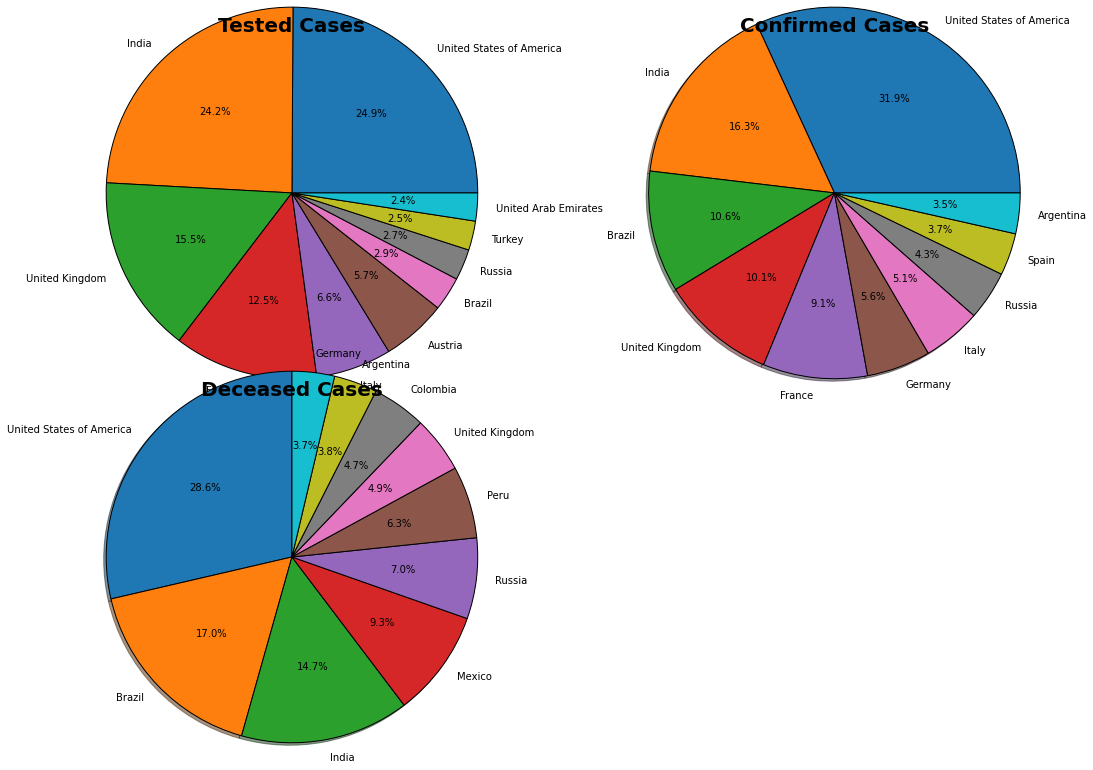

In [21]:
from matplotlib import pyplot as plt

top = 10

# testing
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
tested = country_grouping.new_tested.sort_values(ascending=False).head(top)
plt.pie(tested.values, labels = tested.index, autopct ='%1.1f%%',wedgeprops = {'edgecolor':'black'},shadow=False,radius=1.5)
plt.title('Tested Cases', fontsize=20,weight='bold')

# confirmed
plt.subplot(2,2,2)
confirmed = country_grouping.new_confirmed.sort_values(ascending=False).head(top)
plt.pie(confirmed.values, labels = confirmed.index, autopct ='%1.1f%%',wedgeprops = {'edgecolor':'black'},shadow=True,radius=1.5)
plt.title('Confirmed Cases', fontsize=20,weight='bold')
plt.tight_layout()
#plt.legend(labels)

# deceased
plt.subplot(2,2,3)
deceased = country_grouping.new_deceased.sort_values(ascending=False).head(top)
plt.pie(deceased.values, labels = deceased.index, startangle=90,autopct ='%1.1f%%',wedgeprops = {'edgecolor':'black'},shadow=True,radius=1.5)
plt.title('Deceased Cases', fontsize=20,weight='bold')

plt.show()

## Observations:
- USA has topped 1st in all confirmed, deceased and testing compared to others.
- Next to USA, Brazil and India has recorded high in deceased and confirmed cases.
- United Kingdom also recorded high in testing and confirmed cases followed by India.

## Mortality Rate:

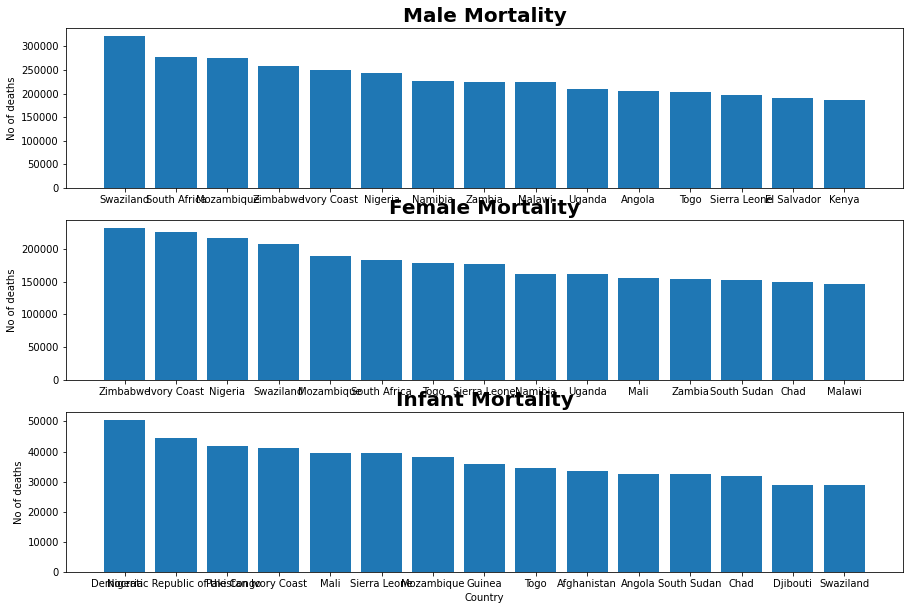

In [22]:
# plot male mortality 
plt.figure(figsize=(15,10))

top = 15

plt.subplot(3,1,1)
male_mortality = country_grouping.adult_male_mortality_rate.sort_values(ascending=False).head(top)
plt.bar(male_mortality.index,male_mortality.values)
plt.title('Male Mortality', fontsize=20,weight='bold')
plt.ylabel('No of deaths')


# plot female mortality 
plt.subplot(3,1,2)
female_mortality = country_grouping.adult_female_mortality_rate.sort_values(ascending=False).head(top)
plt.bar(female_mortality.index,female_mortality.values)
plt.title('Female Mortality', fontsize=20,weight='bold')
plt.ylabel('No of deaths')

# plot infant mortality 
plt.subplot(3,1,3)
infant_mortality = country_grouping.infant_mortality_rate.sort_values(ascending=False).head(top)
plt.bar(infant_mortality.index,infant_mortality.values)
plt.title('Infant Mortality', fontsize=20,weight='bold')
plt.xlabel('Country')
plt.ylabel('No of deaths')


plt.show()

## Observation:
- Swaziland and South Africa has high adult male mortality rate.
- Zimbamwe, Ivory Coast and Nigeria has high adult female mortality rate. 
- Nigeria and Congo has high infant mortality rate.

## Resampling :
### Sampling the daily data to monthly by applying mean

In [23]:
# ref from https://www.geeksforgeeks.org/python-pandas-dataframe-resample/

monthly_avg = covid_data.resample('M').sum()
monthly_avg.tail()

,new_confirmed,new_deceased,new_persons_vaccinated,population,infant_mortality_rate,new_tested,adult_male_mortality_rate,adult_female_mortality_rate,new_hospitalized_patients,new_intensive_care_patients,...,new_intensive_care_patients_male,new_intensive_care_patients_female,current_intensive_care_patients,current_ventilator_patients,new_recovered_male,new_recovered_female,new_persons_vaccinated_pfizer,new_persons_vaccinated_moderna,new_persons_vaccinated_janssen,new_persons_vaccinated_sinovac
date,,,,,,,,,,,,,,,,,,,,,
2021-11-30,37277460.0,455086.0,409542015.0,388880739763,89282.5,393141071.0,844069.282,539280.798,649692.0,22036.0,...,9722.0,7691.0,953473.0,102144.0,2324555.0,2431339.0,273282.0,0.0,0.0,61254.0
2021-12-31,69593843.0,471391.0,304772111.0,397372491197,90915.0,524654003.0,862029.101,549531.474,927180.0,25234.0,...,9027.0,6447.0,1382655.0,100678.0,2543035.0,2663072.0,167346.0,0.0,0.0,32570.0
2022-01-31,225376002.0,531410.0,280469702.0,402916848284,94032.5,684063233.0,878992.521,561562.845,23589628.0,31366.0,...,11202.0,7922.0,1757802.0,76936.0,3648719.0,3928447.0,86800.0,0.0,0.0,14856.0
2022-02-28,114520307.0,559768.0,182590993.0,351894735978,82712.7,407515939.0,781197.010,496831.362,44141143.0,11401.0,...,3052.0,1955.0,1026689.0,46910.0,1244721.0,1331308.0,1848348.0,0.0,0.0,13888.0
2022-03-31,17569582.0,95431.0,20471148.0,90821133468,15548.0,62823643.0,157795.870,97712.150,9093720.0,1308.0,...,188.0,144.0,149203.0,10051.0,93391.0,107294.0,368958.0,0.0,0.0,14408.0


In [24]:
# method to plot bar graph with monthly index and the provided data (y) values

def draw(data = None, title = "", ylabel = ""):
    plt.figure(figsize = (20,5))
    plt.bar(monthly_avg.index , data, width = 3)
    # ,color = ['red','green','blue']
    plt.title(title, fontsize = 15,weight = 'bold')
    plt.xlabel('Month', weight = 'bold')
    plt.ylabel(ylabel, weight = 'bold')

# method to plot bar graph with the provided data (x, y) values   

def draw_obj(data=None, title="", xlabel="", ylabel=""):
    plt.figure(figsize=(20,5))
    plt.bar(data.index , data.values , width=1)
    plt.title(title, fontsize=15,weight='bold')
    plt.xlabel(xlabel, weight = 'bold')
    plt.ylabel(ylabel, weight = 'bold')    

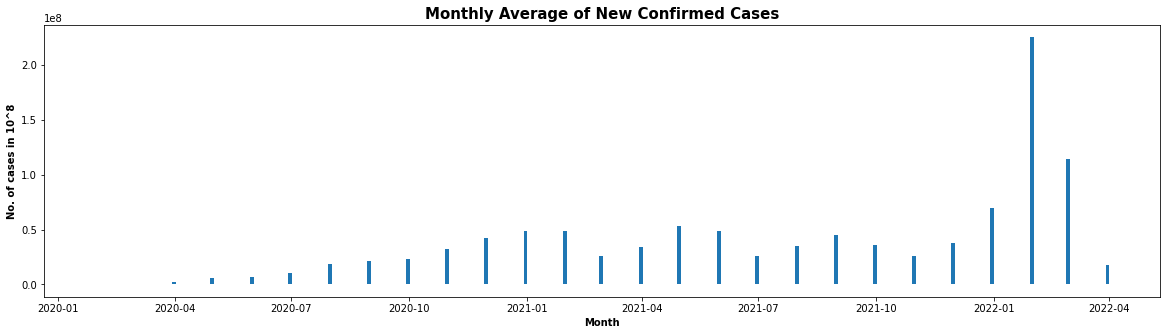

In [25]:
draw(monthly_avg['new_confirmed'],'Monthly Average of New Confirmed Cases','No. of cases in 10^8')

In [26]:
# new_confirmed spike at 2022-01-31, num_deceased is low due to high vaccinations
monthly_avg.sort_values('new_confirmed',ascending=False).head(5)

,new_confirmed,new_deceased,new_persons_vaccinated,population,infant_mortality_rate,new_tested,adult_male_mortality_rate,adult_female_mortality_rate,new_hospitalized_patients,new_intensive_care_patients,...,new_intensive_care_patients_male,new_intensive_care_patients_female,current_intensive_care_patients,current_ventilator_patients,new_recovered_male,new_recovered_female,new_persons_vaccinated_pfizer,new_persons_vaccinated_moderna,new_persons_vaccinated_janssen,new_persons_vaccinated_sinovac
date,,,,,,,,,,,,,,,,,,,,,
2022-01-31,225376002.0,531410.0,280469702.0,402916848284,94032.5,684063233.0,878992.521,561562.845,23589628.0,31366.0,...,11202.0,7922.0,1757802.0,76936.0,3648719.0,3928447.0,86800.0,0.0,0.0,14856.0
2022-02-28,114520307.0,559768.0,182590993.0,351894735978,82712.7,407515939.0,781197.010,496831.362,44141143.0,11401.0,...,3052.0,1955.0,1026689.0,46910.0,1244721.0,1331308.0,1848348.0,0.0,0.0,13888.0
2021-12-31,69593843.0,471391.0,304772111.0,397372491197,90915.0,524654003.0,862029.101,549531.474,927180.0,25234.0,...,9027.0,6447.0,1382655.0,100678.0,2543035.0,2663072.0,167346.0,0.0,0.0,32570.0
2021-04-30,52891163.0,848871.0,455439326.0,408042795349,93923.6,378387567.0,859700.105,554999.685,3461049.0,231054.0,...,121167.0,93029.0,1477091.0,127456.0,1714370.0,1763284.0,221411207.0,30449693.0,0.0,149164.0
2020-12-31,49102783.0,860940.0,8875528.0,426033769353,84268.9,356153183.0,809463.324,514899.225,3130557.0,111178.0,...,53473.0,39677.0,2119915.0,603380.0,1515550.0,1788640.0,0.0,0.0,0.0,0.0


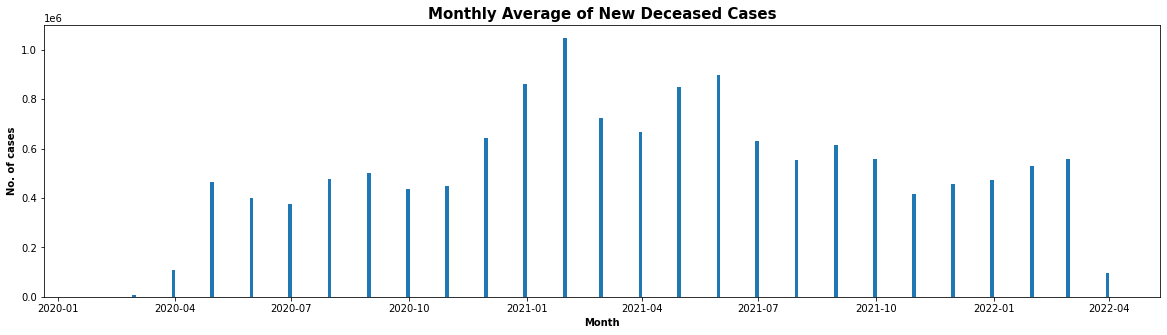

In [27]:
draw(monthly_avg['new_deceased'],'Monthly Average of New Deceased Cases','No. of cases')

## Observation:
- It is observed very high confirmation cases on Jan-Feb 2022.

## Male V/s Female Correlation:

AxesSubplot(0.125,0.125;0.775x0.755)


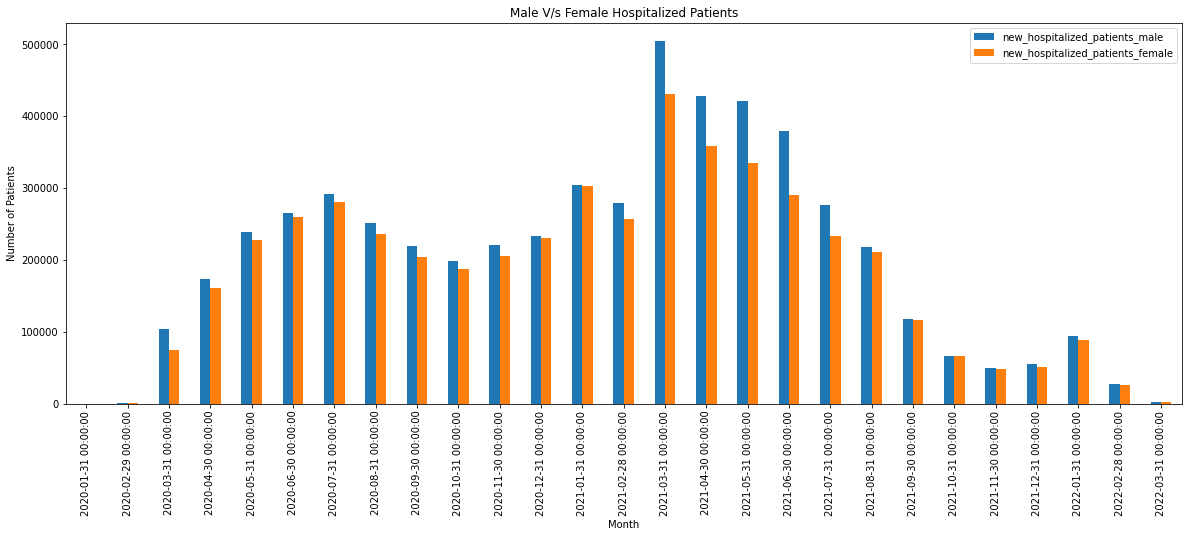

In [28]:
male_female_hospitalized_patients = monthly_avg[['new_hospitalized_patients_male','new_hospitalized_patients_female']]

print(male_female_hospitalized_patients.plot(kind='bar',figsize=(20,7),title='Male V/s Female Hospitalized Patients',
                              xlabel='Month',ylabel='Number of Patients'))

AxesSubplot(0.125,0.125;0.775x0.755)


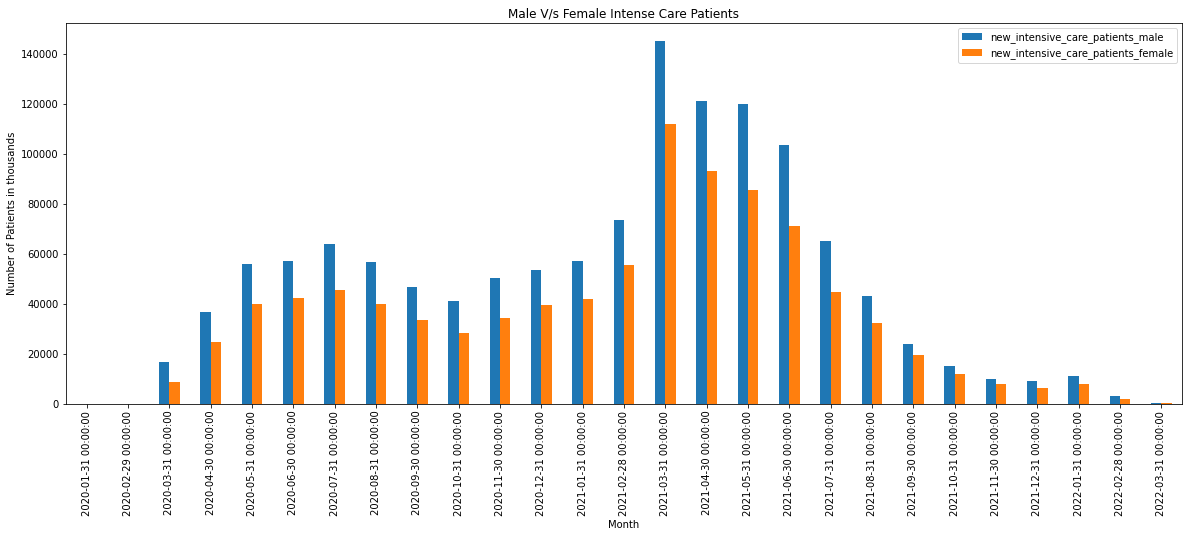

In [29]:
male_female_icu_patients = monthly_avg[['new_intensive_care_patients_male','new_intensive_care_patients_female']]

print(male_female_icu_patients.plot(kind='bar',figsize=(20,7),title='Male V/s Female Intense Care Patients',
                              xlabel='Month',ylabel='Number of Patients in thousands'))


## Observation based on Gender:
- When compared to women men are hospitalized more in number and needs intense care.
- This difference gradually reduced from July 2021 and becomes low and equal.
- Male mortality seems very high compared to women in all the months.

## Vaccination:

Text(0.5, 1.0, 'Vaccination')

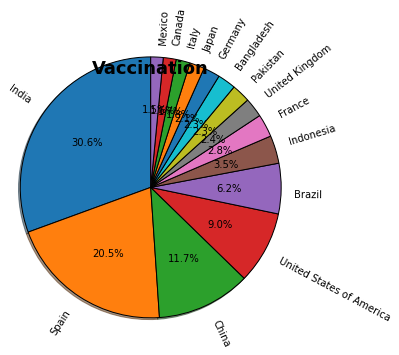

In [30]:
country_vaccination = country_grouping.new_persons_vaccinated.sort_values(ascending=False).head(top)
plt.pie(country_vaccination.values, labels = country_vaccination.index,rotatelabels=True, startangle=90, autopct ='%1.1f%%',wedgeprops = {'edgecolor':'black'},shadow=True,radius=1.5)
plt.title('Vaccination', fontsize=18,weight='bold')

In [31]:
# validating the pie chart with the below data
# get new_persons_vaccinated sum grouping by country and sort in desceiding order

print(covid_data.groupby('country_name').new_persons_vaccinated.sum().sort_values(ascending=False).head())

country_name
India                       1.697404e+09
Spain                       1.137996e+09
China                       6.473020e+08
United States of America    4.998407e+08
Brazil                      3.467095e+08
Name: new_persons_vaccinated, dtype: float64


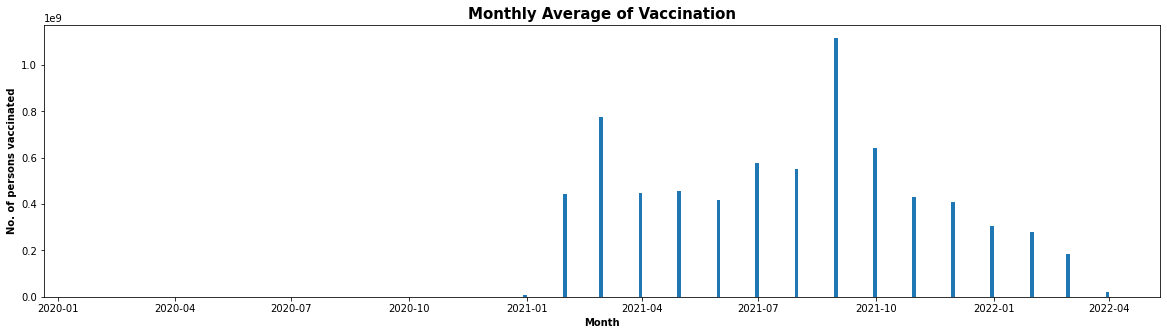

In [32]:
draw(monthly_avg['new_persons_vaccinated'],'Monthly Average of Vaccination','No. of persons vaccinated')

## Observations:
- India has topped in Vaccination with one-third of the totoal vaccinations.
- Spain and China stood at 2nd and 3rd position in vaccination numbers.
- Vaccination recorded high in Aug,Sep 2021

## Critical Cases:

AxesSubplot(0.125,0.125;0.775x0.755)


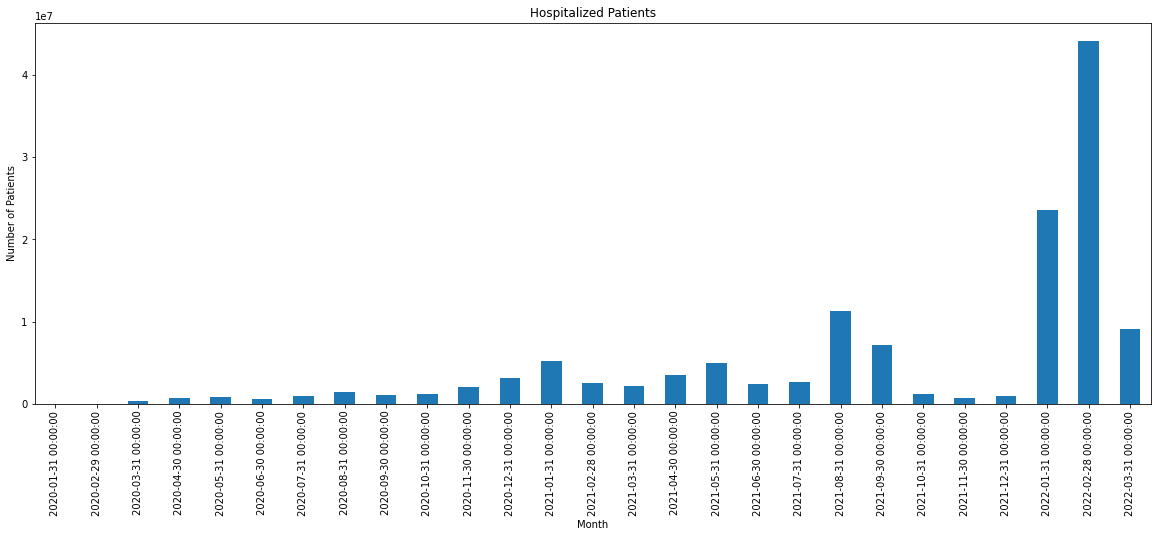

In [34]:
hospitalized_patients = monthly_avg['new_hospitalized_patients']

print(hospitalized_patients.plot(kind='bar',figsize=(20,7),title='Hospitalized Patients',
                              xlabel='Month',ylabel='Number of Patients'))

AxesSubplot(0.125,0.125;0.775x0.755)


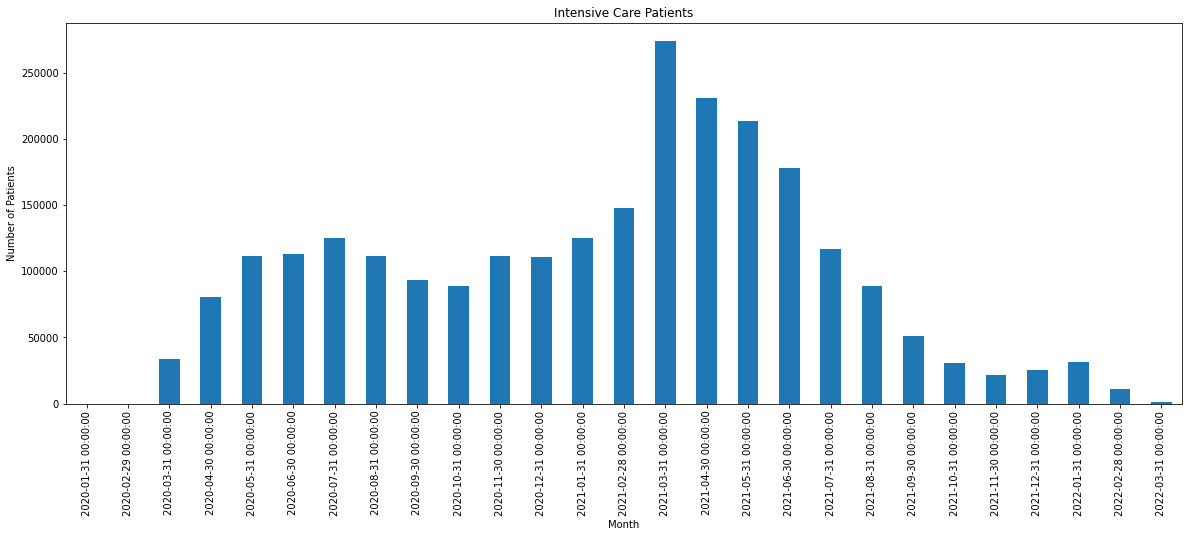

In [35]:
icu_patients = monthly_avg['new_intensive_care_patients']

print(icu_patients.plot(kind='bar',figsize=(20,7),title='Intensive Care Patients',
                              xlabel='Month',ylabel='Number of Patients'))

## Notes:
- It can be seen that **intense care patients** are very low compared to the **hospitalized patients**.
- Need of intensive care gradually decreased from May 2021.

## Summary:
- The given dataset provides **COVID 19** information of different countries.
- As the file size is big, we created an intermediate CSV file which is loaded to a dataframe.
- **USA** has recorded more number of cases and testing.
- Next to USA, **India** has recorded highest confirmed cases and testing.
- **Brazil** and **India** stood at 2nd and 3rd position in deceased next to USA.
- Mortality rate seems almost similar for all the top 10 countries.
- **India** and **Spain** has recorded high in vaccination.
- Compared to Female, males are highly prone to the infection and needs intense care.
- Very few hospitalized patiens needs intense care.